In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

import sys
sys.path.append('./../..')
from dynaphos import utils


In [2]:
plt.style.use('../_figurestyle/small.mplstyle')
PLOT_ZERO_ACTIVATIONS = 'standard' # choose: 'standard', 'ignore', 'crosses'



COLORSTYLE = utils.load_params('../_figurestyle/colors.yaml')
plt.style.use('../_figurestyle/small.mplstyle')

data = pd.read_csv('results/estimated_proportion_phosphene_perception.csv')
virtual_data = pd.read_csv('results/interpolated_estimates_proportion_phosphene_perception.csv')
parameter_estimates = pd.read_csv('results/parameter_estimates.csv', index_col=0).squeeze()

virtual_data

,pulse_width,frequency,train_duration,amplitude,mask_pulse_width,mask_frequency,mask_train_duration,charge_per_phase,charge_per_trial,total_charge_loss_,total_effective_charge_,max_activation_,estimated_proportion_phosphene_perception_
0,0.0001,100.0,0.050,0.000000e+00,False,False,False,0.000000e+00,0.000000e+00,1.195000e-08,-1.195000e-08,0.000000,0.0
1,0.0001,100.0,0.050,1.501502e-07,False,False,False,1.501502e-11,7.507508e-11,1.195000e-08,-1.187492e-08,0.000000,0.0
2,0.0001,100.0,0.050,3.003003e-07,False,False,False,3.003003e-11,1.501502e-10,1.195000e-08,-1.179985e-08,0.000000,0.0
3,0.0001,100.0,0.050,4.504505e-07,False,False,False,4.504505e-11,2.252252e-10,1.195000e-08,-1.172477e-08,0.000000,0.0
4,0.0001,100.0,0.050,6.006006e-07,False,False,False,6.006006e-11,3.003003e-10,1.195000e-08,-1.164970e-08,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,0.0008,300.0,0.166,1.493994e-04,True,False,False,1.195195e-07,5.952072e-06,9.521760e-07,4.999896e-06,0.000002,1.0
35996,0.0008,300.0,0.166,1.495495e-04,True,False,False,1.196396e-07,5.958054e-06,9.521760e-07,5.005878e-06,0.000002,1.0
35997,0.0008,300.0,0.166,1.496997e-04,True,False,False,1.197598e-07,5.964036e-06,9.521760e-07,5.011860e-06,0.000002,1.0
35998,0.0008,300.0,0.166,1.498498e-04,True,False,False,1.198799e-07,5.970018e-06,9.521760e-07,5.017842e-06,0.000002,1.0


In [3]:
x = data.max_activation_
y_true = data.proportion_phosphene_perception
y_pred = data.estimated_proportion_phosphene_perception_

x_interp = virtual_data.max_activation_
y_pred_interp = virtual_data.estimated_proportion_phosphene_perception_

In [29]:
cmap = mpl.cm.GnBu
norm = mpl.colors.Normalize(vmin=0, vmax=1)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)


alt = cmap(norm(np.linspace(0.5,0.9,3)))

In [30]:
COLORSTYLE['turquoise']

['#326e5e', '#63c4ab', '#AFE4DE']

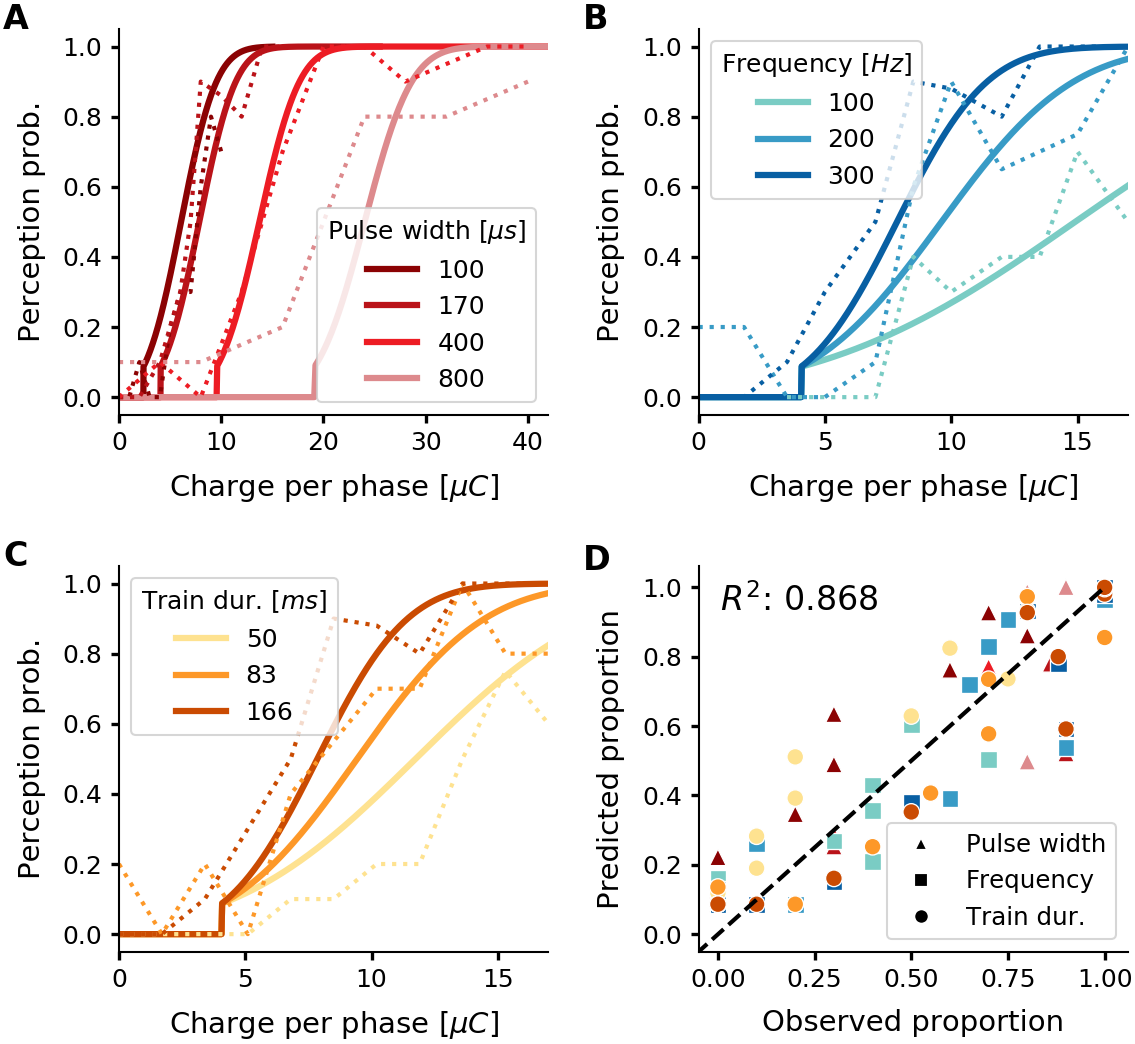

In [31]:


# # # Curve fit (MODEL: max_activation_)
# func_prob = lambda x, mu, sigma: norm.cdf(x, mu, sigma)





# y_pred = func_prob(data.max_activation_, mu=parameter_estimates['50_perc_threshold'], sigma=parameter_estimates['sigma'])
# regress = linregress(y_true,y_pred)
# print(f'estimated activation threshold: {A_thr}, sigma: {sigma}, \nR^2: {regress.rvalue**2:.3f}')

# Interpolated data points (for smooth prediction curve)

# y_pred_interp = func_prob(x_interp,
#                           mu=parameter_estimates['50_perc_threshold'],
#                           sigma=parameter_estimates['sigma'])
# y_pred_interp[virtual_data.max_activation_ == 0] = 0

fig, axs = plt.subplots(2,2,figsize=(4,3.7), dpi=300)
for i, (label, param, colors, xlim,) in enumerate([ ('fig2A','pulse_width', COLORSTYLE['red'], [0,42],),
                                                     ('fig2B','frequency', alt, [0,17]),
                                                     ('fig2C','train_duration', COLORSTYLE['orange'], [0,17])]): #[0,17])]): 
   
    # Zero activations



    # Mask (select the datapoints for the correct experimental parameter: pw, f or td)
    mask = virtual_data[f'mask_{param}'].copy()
    
    
    if PLOT_ZERO_ACTIVATIONS == 'crosses':
        # Change zero activation into crosses 
        zero_activation = (virtual_data.max_activation_  == 0) # mask for the zero_activations
        sns.scatterplot(x=virtual_data.charge_per_phase[mask  & zero_activation]*1e9,
                     y=y_pred_interp[mask & zero_activation],
                     hue=virtual_data.loc[mask & zero_activation,param],
                     ax=axs.flatten()[i],
                     palette=sns.color_palette(colors, n_colors=len(virtual_data[param].unique() )), 
                     marker = 'x',
#                      s=15,
                     alpha = 0.5,
                     linewidths=1.)
        
    if PLOT_ZERO_ACTIVATIONS == 'ignore' or PLOT_ZERO_ACTIVATIONS == 'crosses': 
        # Don't plot a line for the zero activation 
        nonzero_activation = ~(virtual_data.max_activation_  == 0) # mask for the nonzero activations
        mask = mask & nonzero_activation


    sns.lineplot(x=virtual_data.charge_per_phase[mask]*1e9,
                 y=y_pred_interp[mask],
                 hue=virtual_data.loc[mask,param],
                 ax=axs.flatten()[i],
                 palette=sns.color_palette(colors, n_colors=len(virtual_data[param].unique() )), 
                 linestyle='-',)
#                  linewidth=1.8)
    

    
    # Lineplot (data)
    mask = data.label==label
    sns.lineplot(x = data.charge_per_phase[mask]*1e9,
                 y = y_true[mask],
                 hue = data.loc[mask,param],
                 palette=sns.color_palette(colors, n_colors=len(data[param].unique() )),
                 ax=axs.flatten()[i],
                 legend=False,
                 linewidth=1.,
                 linestyle = ':')    
    

    axs.flatten()[i].set(xlim=xlim,
                         ylabel = 'Perception prob.',
                         xlabel = 'Charge per phase [$\mu C$]')
    
    
    # Scatterplot (model vs data)
    mask = data.label==label
    sns.scatterplot(x = y_true,
                    y = y_pred,
                    hue = data.loc[mask,param],
                    palette=sns.color_palette(colors, n_colors=len(data[param].unique() )),
                    ax=axs.flatten()[-1],
                    marker= {'fig2A': '^',
                             'fig2B': 's',
                             'fig2C': 'o',}[label],
                    legend=False)    
    
        
    

# Neater legends (axs 0 to 3)
axs[0][0].legend(['100', '170','400','800'], title='Pulse width [$\mu s$]', loc='lower right')
axs[0][1].legend(['100', '200','300'], title='Frequency [$Hz$]', title_fontsize=6)
axs[1][0].legend(['50', '83','166'], title='Train dur. [$ms$]', title_fontsize=6)

legend_elements = [mpl.lines.Line2D([0], [0], color='w', markerfacecolor='k', marker='^', label='Pulse width'),
                   mpl.lines.Line2D([0], [0], color='w', markerfacecolor='k', marker='s', label='Frequency'),
                   mpl.lines.Line2D([0], [0], color='w', markerfacecolor='k', marker='o', label='Train dur.'),]
axs[1][1].legend(handles=legend_elements, loc='lower right', prop={'size': 5.9,})


# Adjust final 
axs[1][1].plot((-.1,1),(-.1,1),linestyle='--',color='k', linewidth=1.)

axs[1][1].set(ylabel = 'Predicted proportion',
              xlabel = 'Observed proportion',
              xlim = [-.05,None],
              ylim = [-.05,None])
axs[1][1].text(0.005,0.93,f"$R^2$: {parameter_estimates['r-squared']:.3f}", ha='left')


for i, ref in enumerate('ABCD'):
    xlim = axs.flatten()[i].get_xlim()
    xpos = min(xlim) - 0.27 * np.diff(xlim) 
    axs.flatten()[i].text(xpos,1.05, ref, ha='left',  weight='bold' )

plt.tight_layout()

In [28]:
fig.savefig('results/Thresholding_curves_restyled.png')